In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

import sqlite3
con = sqlite3.connect("../orl.db")
cur = con.cursor()

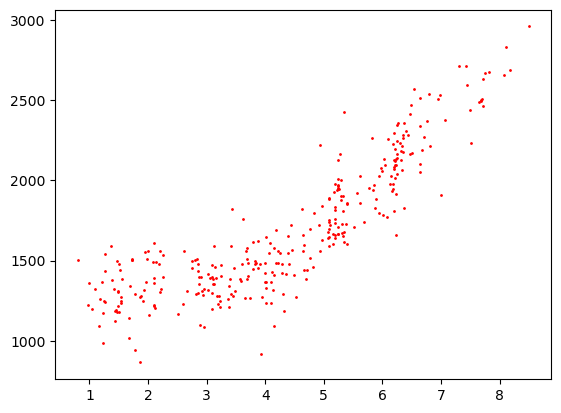

In [3]:
res = cur.execute("SELECT current_mu, stars FROM rating INNER JOIN map ON map.rating_id = rating.rowid WHERE nb_scores > 0 AND map.mode = 3")
elos = []
stars = []

for r in res:
    elos.append(r[0] * 173.7178 + 1500)
    stars.append(r[1])

plt.plot(stars, elos, 'ro', markersize=1)

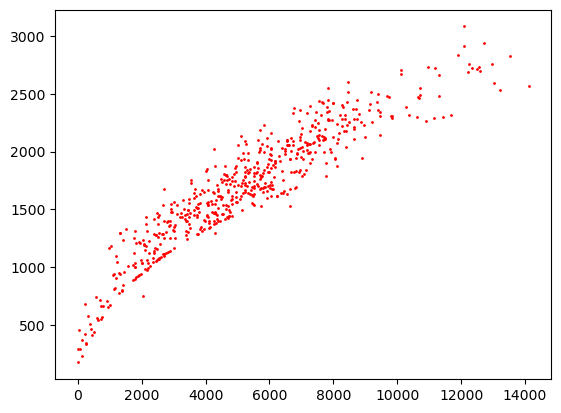

In [6]:
import json

res = cur.execute("SELECT current_mu, profile_data FROM user INNER JOIN rating ON user.osu_rating = rating.rowid WHERE rating.mode = 0 AND nb_scores > 5")
elos = []
pps = []

for r in res:
    elos.append(r[0] * 173.7178 + 1500)
    pps.append(json.loads(r[1])["statistics_rulesets"]["osu"]["pp"] or 0)

plt.plot(pps, elos, 'ro', markersize=1)